# Lasso Presentation

## Introduction

Often when considering a complex prediction problem, it’s difficult to know which factors affect the outcome of interest. This difficulty arises especially in data characterized by a large set of primary explanatory variables for which there are few observations, perhaps causing the number of variables to have the same order of magnitude as the observations. Data with many explanatory variables and relatively few observations appear frequently in financial, medical, and economic research. The general goal with such data is to produce good out-of-sample predictions. However, it is easy to construct a predictor that works well in-sample, but fails miserably out-of-sample. To take a trivial example, n linearly independent regressors will fit n observations perfectly but will usually have poor out-of-sample performance. This phenomenon is referred to as the “overfitting problem” (Varian 2014). Because simpler models tend to work better for out-of-sample predictions, machine learning experts have come up with various ways to penalize models for excessive complexity, one way being “regularization”. Without regularizing (or shrinking) the coefficients for questions like which of the thousands of genes cause cancer, statistical models on such high magnitude data would be very unstable. Additionally, since there are many possible choices for predictors, it is difficult to know which predictors are correlated with the outcome of interest, and hence one must use some variable selection mechanism. To make these problems more workable and identify the predictors of interest, researchers have designed regularization methods specifically to handle high dimensional data. One of these methods more recently developed is called Lasso.

Lasso stands for Least Absolute Shrinkage and Selection Operator. Lasso is a regression technique which relies on penalties to reduce (“shrink”) the values of predicted coefficients towards 0. While some shrinkage methods have been around since the 1960s (see Hoerl), Lasso regression was first pioneered by Robert Tibshirani in his 1996 paper “Regression Shrinkage and Selection via the Lasso”. Until that time, the standard techniques for improving OLS estimates were best subset selection and ridge regression, but both have drawbacks. Best subset selection converts some coefficients to 0, making the models more interpretable but can be extremely volatile because its discrete process either drops a regressor entirely or keeps it with coefficient otherwise unaltered. Its predictive accuracy suffers because small changes in sample data may generate very different variable selection. Though ridge regression is a continuous, more stable process for shrinking coefficients, it cannot eliminate any regressors and hence does not give an easily interpretable model. Lasso, on the other hand, retains the good features of best subset selection and ridge regression: variable selection (for interpretability) and shrinkage (for accuracy) (Tibshirani 1996).

Lasso is best suited to deal with models that show a high level of multicollinearity.  Multicollinearity exists whenever two or more of the predictors in a regression model are moderately or highly correlated. Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients as constraints. This type of regularization subtracts a constant from all coefficients.  Using soft thresholding, any coefficient that reaches or passes 0 after the penalty is forced to 0. Thus, depending on the level of penalty, Lasso can eliminate parameters and produce sparse models with few covariates. Larger penalties increase the number of eliminated covariates, lowering the variance while increasing the bias. In contrast, small penalties produce less interpretable models with high variance but low bias (Chan-Lau 2017). The trade-off between bias and variance is a major component of specifying a Lasso model. In practice, researchers employ cross-validation to determine the optimal penalty level.  Though Lasso offers advantages to other shrinkage methods or least squares, it is not without disadvantages. Drawbacks from Lasso include potentially removing important control variables and arbitrarily dropping regressors from a group of important, highly correlated ones. Therefore, depending on the intent of the study and the nature of the dataset, Lasso may or may not be the best model to apply. 

Although Lasso has only been discussed in the context of linear regressions, the technique may be more broadly applied. Lasso-type estimators can also accommodate models other than the linear models. It is possible to use Lasso estimators in generalized linear models including logistic regression, multiclass logistic regression, Cox proportional hazard models, support vector machines, and also in semiparametric nonlinear mixed effect models (Arribas-Gil, Bertin, Meza, and Rivoirard 2014) and nonlinear regressions (Tateishi, Matsui, and Konishi 2010). Furthermore, there have been several variations to improve Lasso in such different contexts. One modification to Lasso, as proposed by Victor Chernozhukov, is called Square-root lasso. It is a alternative method for estimating high-dimensional sparse linear regression model where the number of regressors in the model (p) is much larger than the number of “individuals” (n), but only few of those regressors are significant. Square root Lasso is designed to deal with non-Gaussian heteroscedastic disturbances using a data-weighted penalty function (A. Belloni, Chernozhukov, and Wang 2011).

In [1]:
from IPython.display import Image
PATH = "/Users/J.Alvarez/Pictures/Screenshots/"

## Analytical framework

Lasso is a regression technique that modifies the estimates of unconstrained regressions. There are two choices necessary to using the model: an unconstrained regression type and a constraint value. In this technical description of Lasso, we will assume a linear model. The linear model may be exchanged for a more complicated one, but the basic linear system is sufficient to represent the Lasso methodology. The base model chosen depends on the assumptions made about the data and outcome of interest. Assume there are Nobservations and p parameters. Then, given a set of parameters and an outcome variable, the relationship of interest is
 

$$Y_i = X_i '\beta + \epsilon_i  \qquad (1)$$

$$Y_i = [y_1 y_2 ... y_N ], \phantom{3}   X_i ' = [X_{1i} X_{2i} ... X_{p-1i}],  \phantom{3}    \beta= [\beta_0 \beta_1 ... \beta_{p-1}],  \phantom{3}  \epsilon = [\epsilon_1 \epsilon_2 .. \epsilon_N].   $$

To perform Lasso, we need to minimize the squared residuals under the constraint that the sum of the magnitude of all estimated coefficients be limited to a certain value, t.  It follows that the estimator is defined by

$$\hat \beta ^ {lasso} = argmin \sum_{i=i}^n (y_1 - \beta_0 - \sum_{j=0}^{p-1} (x_{ij} \beta_j))^2  \phantom{10} Subject \phantom{1} to \phantom{3}  \sum_{j=0}^{p-1} \lvert \beta_j \rvert \phantom{1} \leqslant t \phantom{10} \qquad (2)$$

This constraint problem can also be represented in lagrangian form as:

$$\hat \beta ^ {lasso} = argmin \frac{1}{2}\sum_{i=i}^n (y_1 - \beta_0 - \sum_{j=0}^{p-1} (x_{ij} \beta_j))^2 +  \lambda \sum_{j=0}^{p-1}  \lvert \beta_j \rvert ) \phantom{50} \qquad (3)$$ 

Unfortunately, there is no closed-form solution for $\beta ^ {lasso}$ like for basic least squares regression. But a unique solution for $\beta ^ {lasso}$ can be calculated using efficient computer algorithms such as LAR (least angle regression).  We can turn to these algorithms once selecting a value for $t$, the constraint variable.  The more stringent the choice for $t$, the more shrinkage and variable selection the original linear model will experience.  It is possible to choose $t$ such that the OLS and Lasso coefficients will be the same (i.e. if $ t \leqslant \sum_{j=1} ^ {p}  \lvert \beta_j ^ {OLS} \rvert ) $, but that is usually not optimal in data with high dimensionality. Constraining the regression by limiting the sum of the absolute value of the coefficients is called L1 regularization.  In contrast, ridge regression uses L2 regularization to shrink coefficients.  The following figures compare the geometric interpretation of L1 and L2 regularization for Lasso and ridge regression with two parameters:

<img src="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson05/image_09.gif" alt="LASSO vs. Ridge" title="Geometric interpretation" />

Before any constraints, the point labeled $ \hat \beta$ represents the solution for the least squares minimization problem. The blue regions centered at the origin represent the constraint $t$. On the left, L1 regularization (Lasso) reduces the coefficients such that $ \lvert \beta_1 \rvert + \lvert \beta_2 \rvert \leqslant t $, which results in the diamond shape.  On the right, L2 regularization (ridge) requires $  \beta_1^2  +  \beta_2^2 \leqslant t^2 $, the equation for a circle with radius $t$.  Finally, the red ellipses around $ \hat \beta$ are level curves of the residual sum of squares from different combinations of $ \beta_1 $and $ \beta_2$  $ (Hastie, et. al. 2017)$. In the two figures above, $ \hat \beta$ is the same and therefore the red ellipses are equal. However, because the solution lies where the residual sum of squares contour first touches the constraint region, despite having the same constraint value of $t$, Lasso and ridge estimates are different.  The two-dimensional example visually captures why the estimates diverge. First,  L1 regularization creates corners on the constraint region.  Solutions that touch a corner will set one or more parameters to 0. Conversely, the circle has no corners and the solution can never lie on an axis to set a parameter to 0. Second, the edges of the L1 constraint are nearer to the origin so that solutions along the diamond’s edges will be lower than solutions along the circle’s edge.    
   
For each value of $t$, there is a corresponding value of  $\lambda$ that gives the same solution. The two values have an inverse relationship: $t$ goes to $
\infty $ and $\lambda$ goes to 0 for the coefficients to converge to the OLS estimates (i.e. the constraint has no effect). Thus, another instructive way to compare ridge and Lasso estimates is by analyzing the effect of the tuning parameter $\lambda$ on estimates in the orthonormal case $(X'X=I)$. Figure 2 illustrates the effect of the tuning parameter from the lagrangian form.  The 45° line represents where unconstrained coefficients will lie in an orthonormal setting while the red dotted lines shows how $\lambda$ reduces the estimates toward 0. In ridge regression, the values are reduced by dividing by a constant, or $ \hat \beta_j ^ {ridge} =
\frac{\hat \beta_j ^ {ols}}{(1 + \lambda)} $. There is no variable selection in this case because division by a constant won’t convert an estimate to 0. With Lasso regression, at each point along the line, $\lambda$ is subtracted from the magnitude $x$, or $\hat \beta_j ^ {lasso} = sign(\hat \beta_j ^ {ols})(\lvert \hat \beta_j ^ {ols} \rvert - \lambda)^{+}$ (Hastie, et. al. 2017). The soft-thresholding of Lasso makes it so any $\lvert \hat \beta_j ^ {ols} \rvert \leqslant \lambda$ become $\hat \beta_j ^ {lasso} = 0$.  As seen in the figure, ridge merely rotates the line around the origin while Lasso translates the line on either side of the x-axis towards 0.



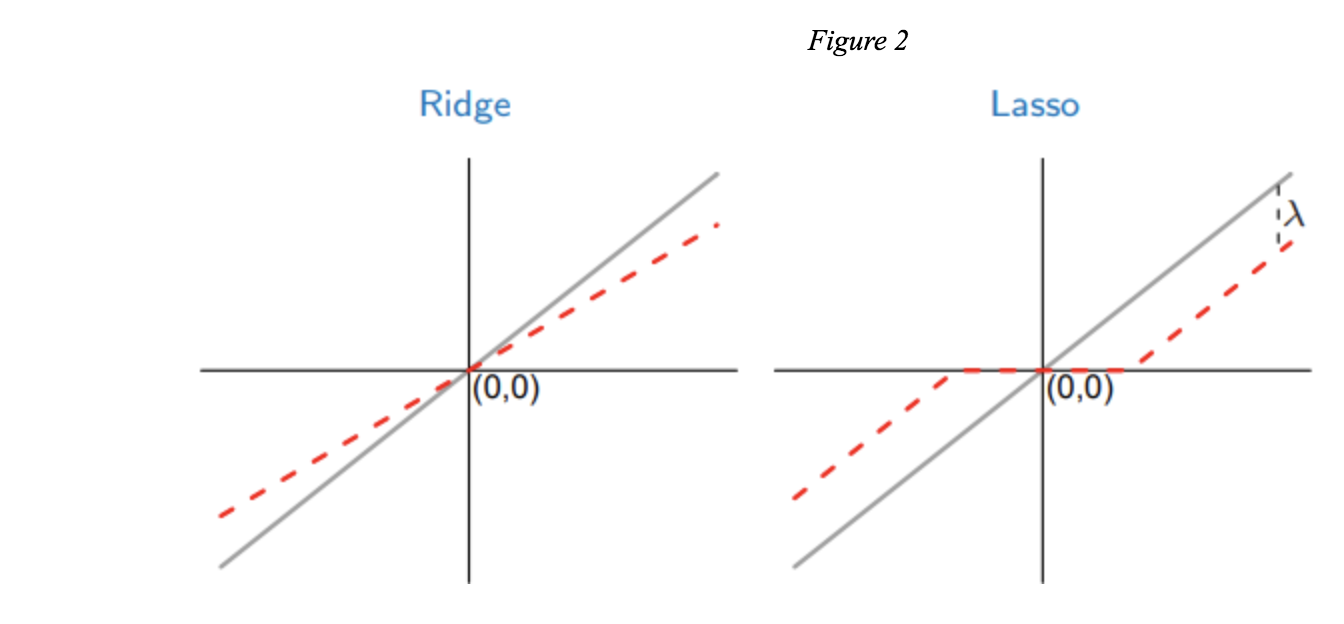

In [39]:
Image(filename = PATH + "fig2.png", width=900, height=100)

Because varying choices $t$ (or $\lambda$ ) can dramatically affect the estimates, variance, and bias of a Lasso regression, the choice of $t$ (or $\lambda$ ) must be a careful one.  An optimal constraint is derived by minimizing the estimate of the expected predicted error, i.e. minimize $bias^2 + variance$. A good way to minimize the predicted error is by performing several iterations of cross validation (k-fold cross validation).  In Figure 3, the out of sample mean squared error is plotted against log($\lambda$) with the number of covariates selected by Lasso at each log($\lambda$) listed at the top. The vertical line to the left represents the minimizing (log($\lambda$), a good option for the tuning parameter.  However, sometimes instead of electing the constraint to exactly minimize the expected predicted error, the one standard error rule may be invoked. The process begins by determining the expected predicted error curve and its standard deviation. Then choose the $\lambda$ within one standard deviation of the error minimizing $\lambda$ that produces the sparsest model  (Hastie, et. al. 2017). In the figure, the vertical line to the right of the minimizing log($\lambda$) shows the choice for log($\lambda$) that is both within one standard deviation of the minimum and includes the fewest covariates (7 instead of 12).  In practice, researchers tend to calculate $\lambda$ in place of $t$ and prefer the one standard error rule for best model selection.

Often the last step of Lasso is running a final least squares regression, called post-Lasso. The coefficients outputted by Lasso are difficult to interpret (though there are few) because of the shrinkage.  So having determined an optimal constraint $t$ and running Lasso to generate a sparse model, we have determined a good subset of parameters for a regression.  Using the remaining covariates, a standard linear regression is run for a sparse model with coefficients more likely to be near their true value. This does not necessarily mean that the post-Lasso estimates are unbiased and available for causation analysis.  Standard errors for these estimates may be determined using the bootstrap method, but there is argument against trying to interpret the estimates using standard errors at all.  

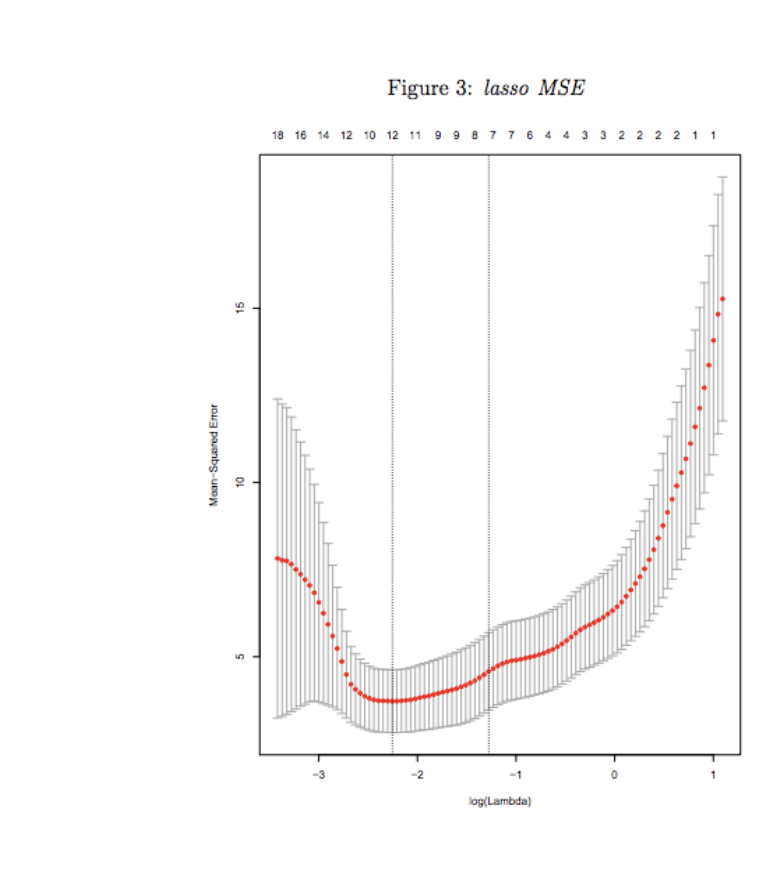

In [45]:
Image(filename = PATH + "fig3.png", width=500, height=80)

# Application

### Question: How should resources be allocated to make a highly rated movie?

### Available Data: 
We are using a cross-sectional data set of 5,043 movies found online compiled by Chuan Sun.  He scraped the data for the movies, which come from 66 different countries over a 100 year span, from both IMDB and movie posters.  For each movie, there are 28 attributes including director name, genre, and budget.  Since many of these attributes are qualitative, we created dummy variables in order to include the important characteristics in the regression.  After adding the dummies in for names, genres, etc., the data set grew to over 3000 variables for 3,756 observations.  

With such a large number of variables (though still below the number of observations), Lasso is a great choice given standard least squares would produce an unusable, overfit model. By using Lasso, we will be abe to see which from all the variables are most important and how they can help in producing a successfull movie.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm, skew
import warnings
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import linear_model
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
color = sns.color_palette()
sns.set_style('darkgrid')

In [4]:
#please change this directory to where you store the downloaded csv in your own computer.
data = pd.read_csv('/Users/J.Alvarez/github/Lasso/movie_metadata.csv')
data = data.dropna(how='any')
data = data.drop(['movie_title','plot_keywords','movie_imdb_link','actor_3_name','actor_2_name','language','genres','num_critic_for_reviews','gross','num_voted_users','num_user_for_reviews','movie_facebook_likes'],axis=1)

In [5]:
list(data)

['color',
 'director_name',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'actor_1_name',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio']

In [6]:
data = pd.get_dummies(data)

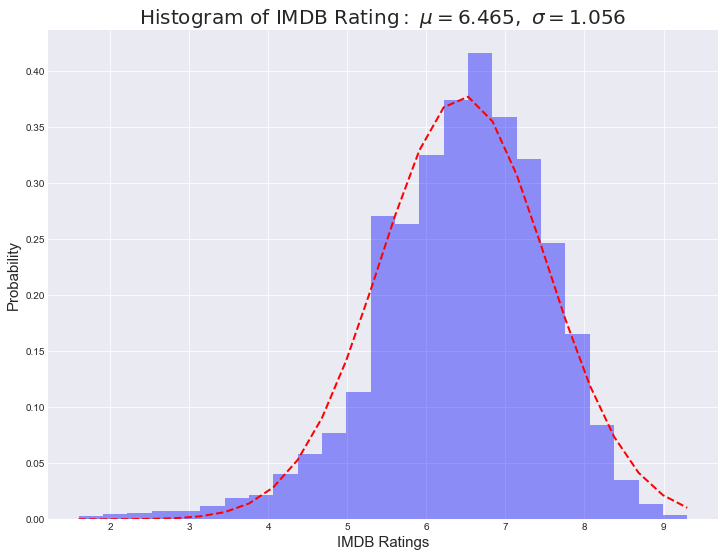

In [7]:
# best fit of data
datos = data['imdb_score']
(mu, sigma) = norm.fit(datos)

# the histogram of the data
plt.figure(1, figsize=(12, 9))
n, bins, patches = plt.hist(datos, 25, normed=1, facecolor='b', alpha=0.4)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('IMDB Ratings', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title(r'$\mathrm{Histogram\ of\ IMDB\ Rating:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma), fontsize=20)
plt.grid(True)

plt.show()


### Graphing some relevant relationships

#### Director Ratings

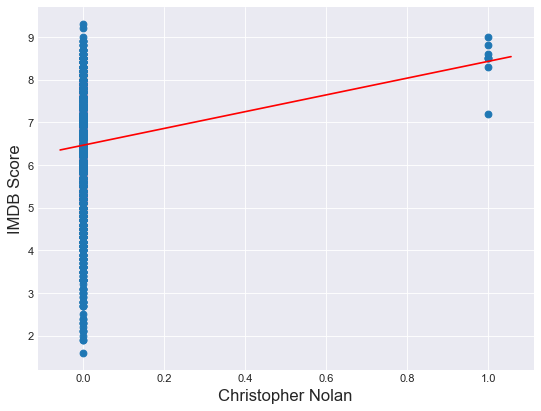

In [8]:
plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='green')
y = data['imdb_score']
x = data['director_name_Christopher Nolan']
plt.scatter(x, y)
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color="red")
plt.xlabel('Christopher Nolan', fontsize=15)
plt.ylabel('IMDB Score', fontsize=15)
plt.show()

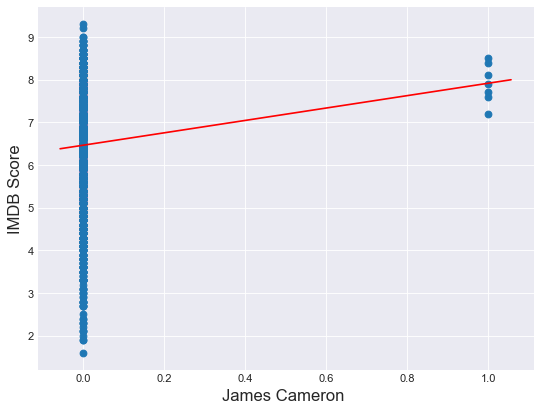

In [9]:
plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='green')
y = data['imdb_score']
x = data['director_name_James Cameron']
plt.scatter(x, y)
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color="red")
plt.xlabel('James Cameron ', fontsize=15)
plt.ylabel('IMDB Score', fontsize=15)
plt.show()

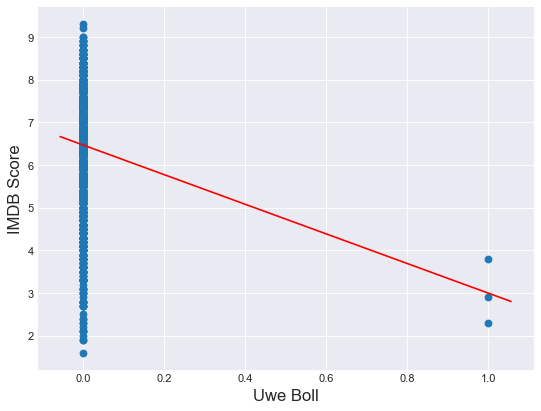

In [10]:
plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='green')
y = data['imdb_score']
x = data['director_name_Uwe Boll']
plt.scatter(x, y)
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color="red")
plt.xlabel('Uwe Boll', fontsize=15)
plt.ylabel('IMDB Score', fontsize=15)
plt.show()

#### Other interesting relationships

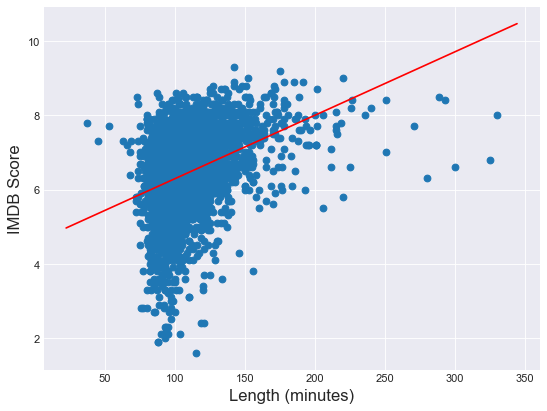

In [11]:
plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='green')
x = data['duration']
y = data['imdb_score']
plt.scatter(x, y)
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color="red")
plt.xlabel('Length (minutes)', fontsize=15)
plt.ylabel('IMDB Score', fontsize=15)
plt.show()

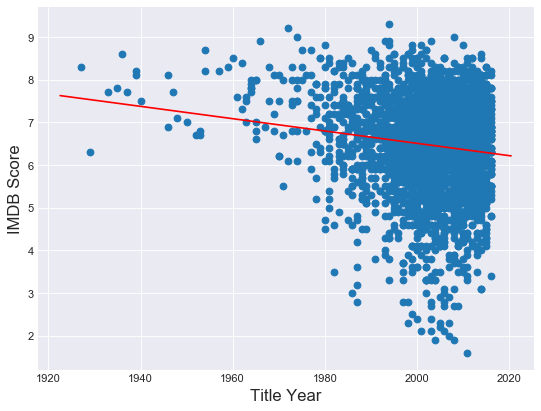

In [12]:
plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='green')
x = data['title_year']
y = data['imdb_score']
plt.scatter(x, y)
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color="red")
plt.xlabel('Title Year', fontsize=15)
plt.ylabel('IMDB Score', fontsize=15)
plt.show()

## Lasso Example
Running lasso to find what the most important variables from the dataset are.

In [14]:
# Make and standardize Y variable
Y = data['imdb_score']
Y = (Y - Y.mean()) / Y.std()

In [15]:
# Make the X matrix. We need to exclude variables that aren't numbers and the Y variable
X = pd.DataFrame()
for col in list(data):
    if (data[col].dtype == 'float64' or data[col].dtype == 'int64' or data[col].dtype == 'uint8') and (col != 'imdb_score'):
        X[col] = (data[col] - data[col].mean()) / data[col].std()

In [16]:
#Split the data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y)

In [17]:
#declare the model
lasso = linear_model.Lasso(alpha=0.04)

In [18]:
#run the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
#Score the model
lasso.score(X_test, y_test)

0.19860199760603547

In [20]:
lasso.coef_

array([ 0.28144966,  0.07618426,  0.        , ...,  0.04601487,
        0.        ,  0.        ])

In [21]:
#for completeness let's compare Lasso to a linear regression
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#Score linear regression.
linear.score(X_test,y_test)

-1.0485049964663975e+29

In [23]:
linear.coef_

array([  2.30518862e-01,   2.12633631e+02,   4.15855368e-02, ...,
        -3.85623381e+12,  -5.91188313e+11,  -3.99219025e+11])

In [24]:
#get unpenalized coeficients:
X_newtrain = pd.DataFrame()
X_newtest = pd.DataFrame()
for var in range(0, len(list(X))):
    if lasso.coef_[var] > 0.001 or lasso.coef_[var] <  -0.001:
        
        X_newtrain[list(X)[var]] = X_train[list(X)[var]]
        X_newtest[list(X)[var]] = X_test[list(X)[var]]
print(len(list(X_newtrain)))
linear2 = linear_model.LinearRegression()
linear2.fit(X_newtrain,y_train)
linear2.score(X_newtest,y_test)

116


0.20933205428910795

In [25]:
frame = pd.DataFrame()
frame['lasso_coef'] = pd.Series(lasso.coef_)
frame['linear_coef']= pd.Series(linear.coef_)

In [26]:
frame['vars'] = pd.Series(list(X))

In [27]:
frame = frame[(frame.lasso_coef > 0.04) | (frame.lasso_coef < -0.04) ]

In [28]:
# frame with the important variables and their coefficients
frame

,lasso_coef,linear_coef,vars
0,0.281450,2.305189e-01,duration
1,0.076184,2.126336e+02,director_facebook_likes
8,0.045452,1.252464e-01,actor_2_facebook_likes
10,0.060199,1.727949e+12,color_ Black and White
663,-0.067634,-5.522510e+10,director_name_Jason Friedberg
3038,-0.044434,1.046245e+11,actor_1_name_Usher Raymond
3142,-0.088092,-3.247141e+12,country_USA
3151,-0.059580,-3.690939e+12,content_rating_PG-13
3153,0.046015,-3.856234e+12,content_rating_R


In [29]:
graph = pd.DataFrame()
graph['actual'] = (y_test * data['imdb_score'].std()) + data['imdb_score'].mean()
graph['predicted'] = (lasso.predict(X_test) * data['imdb_score'].std()) + data['imdb_score'].mean()

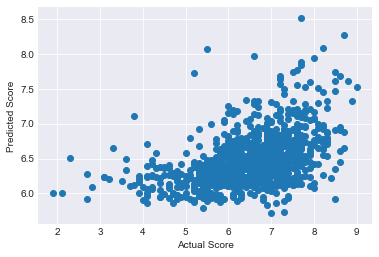

In [30]:
fig, ax = plt.subplots()
ax.scatter(graph['actual'].values, graph['predicted'].values)
ax.set_xlabel('Actual Score')
ax.set_ylabel('Predicted Score')
plt.savefig('importances.png', bbox_inches='tight',dpi=300)

### Aditional example similar to the one from class.
Create a dataset with 100 variables, where only 3 of those variables are correlated with the observations.

In [32]:
#create the data
import numpy as np
X1 = pd.DataFrame(np.random.uniform(low=0,high=1,size=(1000,100)))
eps = pd.Series(np.random.uniform(low=0,high=1,size=1000))
Y1 = 1/4 * (X1[0] + X1[1] + X1[2] + eps)
X1_train, X1_test, Y1_train, Y1_test = model_selection.train_test_split(X1,Y1)


In [33]:
#create and fit regressions
lasso1 = linear_model.Lasso(alpha=0.002)
linear1 = linear_model.LinearRegression()
lasso1.fit(X1_train,Y1_train)
linear1.fit(X1_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#score lasso
lasso1.score(X1_test,Y1_test)

0.7345468446482003

In [35]:
#score OLS
linear1.score(X1_test,Y1_test)

0.73607569911313231

In [36]:
#see lasso params
lasso1.coef_

array([ 0.22377122,  0.21867917,  0.22568953,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.  

## Conclusion

In instances of data with high dimensionality, OLS fails to produce workable models.  We wanted to compare OLS estimates to Lasso estimates in a dataset for how to predict movie popularity.  After cleaning the data, we ended up with 3,756 observations and 3,157 predictors.  As hypothesized, OLS performed very badly with so many coefficients to estimate and gave a negative R-squared, an absurd measure for goodness of fit.  Even with a couple thousand dummy variables, however, the Lasso model included only 125 variables at $\lambda$=0.04 and had an R-squared of about 0.24. With R-squared inside a reasonable range and the number covariates drastically limited, the Lasso model became much easier than OLS and use it for accurate predictions. 
	
Of the 3,157 characteristics of each movie that might affect its IMdB rating, Lasso eliminated over 3,000.  Due to the powerful model selection, we can conclude that some of the variables with the most predictive power for ratings are duration of the movie (+0.286), the number of likes a director had on Facebook (+0.092), letting Uwe Boll direct the movie (-0.051), and producing the movie in the US (-0.089). Many of these variables are out of our control, so it is important to understand that it is important to have many variables, however onlythose which we have control over will be effective in choosing where to allocate resources. Weather and other variables that are simply out of our control should be considered carefully. There may be some problems with this conclusion, however. Recall that a weaknesses of Lasso is that it often selects one variable at random out of a group of highly correlated covariates.  Thus, one of our remaining variables might be hiding an important cluster of variables with high predictive power.  We chose a constraint value based on cross validation, but it could help predictive accuracy to increase the constraint in order to include more of the eliminated variables. 

<b>Sources: </b>

Arribas-Gil, A., K. Bertin, C. Meza, and V. Rivoirard. “Lasso-type Estimators for Semiparametric Nonlinear Mixed-Effects Models Estimation.” Statistics and Computing, 24, (3): 443 – 460. 

 A. Belloni, V. Chernozhukov, L. Wang; Square-root lasso: pivotal recovery of sparse signals via conic
programming, Biometrika, Volume 98, Issue 4, 1 December 2011, Pages 791–806.

Chan-Lau, Jorge A. 2017. “Lasso Regressions and Forecasting Models in Applied Stress Testing.” IMF Working Paper WP/17/108. 

Hoerl, A. E. 1962. “Application of Ridge Analysis to Regression Problems.” Chemical Engineering Progress, 1958: 54–59. 

Tateishi, S., H. Matsui, and S. Konishi. 2010. “Nonlinear Regression Modeling via the Lasso-Type Regularization.” Journal of Statistical Planning and Inference, 140, (5): 1125 – 1134. 

Tibshirani, Robert. 1996. “Regression Shrinkage and Selection via the Lasso.” Journal of the Royal Statistical Society 58, (1): 267-288. 

Varian, Hal R. 2014. “Big Data: New Tricks for Econometrics.” Journal of Economic Perspectives 28, (2): 3-28. 

Hastie, Trevor, Robert Tibshirani, and J. H. Friedman. The Elements of Statistical Learning: $Data\ Mining,\ Inference,\ and\ Prediction.\ New\ York\ $: Springer, 2017.

 
Data: https://chuansun76.com/2016/09/23/how-to-tell-the-greatness-of-a-movie-before-it-is-released-in-cinema/
